# Autor:


*   Bruno Santome Antolín ⏩ 100405889

# Clustering de canciones de Tik tok

Importamos el drive y los datos desde el csv. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
lib_loc <- "/content/drive/MyDrive/Datos/r-lib"

In [4]:
%%R
#Carga datos del fichero
dfMedidas <- read.csv("/content/drive/MyDrive/AnalisisDatos/Datos/TikTok_songs_2021.csv")

# Descripción de los datos. 

In [5]:
%R -o dfMedidas

dfMedidas

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
1,STAY (with Justin Bieber),The Kid LAROI,83,STAY (with Justin Bieber),89,0.591,0.764,-5.484,1,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4,141806
2,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,90,Justice,86,0.677,0.696,-6.181,1,0,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4,198082
3,edamame (feat. Rich Brian),bbno$,72,edamame (feat. Rich Brian),77,0.815,0.848,-4.704,0,4,0.1150,0.0230,0.000162,0.0265,0.684,106.032,4,133707
4,Here's Your Perfect,Jamie Miller,65,Here's Your Perfect,77,0.558,0.454,-5.335,1,6,0.0551,0.4990,0.000000,0.1460,0.424,113.120,4,158594
5,It's You,Sezairi,57,It's You,73,0.630,0.456,-8.285,1,8,0.0317,0.5450,0.000000,0.1140,0.166,137.915,3,251440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Panda,Desiigner,63,Panda,67,0.685,0.731,-5.503,0,10,0.4140,0.0292,0.000000,0.3690,0.266,145.245,4,247867
187,TO THE MOON,Jnr Choi,63,TO THE MOON,79,0.745,0.650,-11.814,1,2,0.3460,0.0451,0.007580,0.1110,0.386,144.047,4,152137
188,Upside Down,JVKE,71,Upside Down,65,0.880,0.501,-6.774,1,2,0.0620,0.0494,0.069500,0.4360,0.459,120.038,4,114500
189,lowkey,NIKI,75,lowkey,76,0.752,0.494,-8.180,1,0,0.0559,0.4320,0.000000,0.0869,0.227,117.901,4,171356


Nuestro dataset se compone de 190 filas y 15 columnas. 
Es decir hay un total de 190 canciones y 15 variables. 
Vamos a analizar el significado de cada variable

track_name: El nombre de la canción

artist_name; El nombre del artista

artist_pop; Indice que indica la popularidad del artista

album: EL nombre del album

track_pop: Indice de la popularidad de la canción

danceability: indice que indica cuan de danceable es la canción

energy: Indice que indica la la cantidad de energía que desprende la 

canción (No energia fisica) 

loudness: Indice que indica el volumen de la canción 

mode:No entiendo esta variable. 

key: No entiendo esta variable. 

speechiness: indice que indica la habladuría de la canción

acousticness: indice que indica la la acústica de la canción

instrumentalness:indice que indica la instrumentalidad de la canción

liveness: indice que indica la vivacidad de la canción

valence: Describe la positividad musical transmitida por una pista.

tempo: el tempo de la canción 

time_signature:indicar cuántos tiempos hay en cada compás de una pieza musical, así como qué valor de nota se cuenta como un tiempo

duration_ms: La duración de la canción en milisegundos. 








# Analisis descriptivo 

In [6]:
%%R
if (!require("psych", lib.loc = lib_loc)) install.packages("psych", lib = lib_loc)
library(psych, lib.loc = lib_loc)
describe(dfMedidas)

                 vars   n      mean       sd    median   trimmed      mad
track_name*         1 190     94.97    54.56     94.50     94.97    69.68
artist_name*        2 190     77.13    44.54     76.50     76.94    54.11
artist_pop          3 190     70.88    15.30     73.50     72.40    14.08
album*              4 190     88.09    49.09     89.50     88.24    61.53
track_pop           5 190     65.58    22.92     73.00     70.30    11.12
danceability        6 190      0.71     0.12      0.71      0.71     0.10
energy              7 190      0.67     0.15      0.69      0.68     0.15
loudness            8 190     -5.93     2.31     -5.70     -5.72     2.04
mode                9 190      0.62     0.49      1.00      0.65     0.00
key                10 190      4.89     3.66      5.00      4.78     4.45
speechiness        11 190      0.09     0.09      0.06      0.07     0.03
acousticness       12 190      0.20     0.22      0.12      0.17     0.17
instrumentalness   13 190      0.01   

Algunos comentarios sobre los datos: 

Podemos ver que la canción con más duración dura 5,74 minutos y la que menos 1,33 minutos.
 
El indice maximo de popularidad es 95 y el minimo 0. 



In [7]:
#El artista más popular es Drake
%%R 
df1 <- dfMedidas[(dfMedidas$artist_pop == max(dfMedidas$artist_pop)),]
print(df1$track_name)
print(df1$artist_name)


[1] "In The Bible (with Lil Durk & Giveon)"
[1] "Drake"


In [8]:
%%R 
#El artista menos popular es "cry" y en concreto la canción "Fashion Week"
df3 <- dfMedidas[(dfMedidas$artist_pop == min(dfMedidas$artist_pop)),]
print(df3$track_name)
print(df3$artist_name)

[1] "Fashion Week"
[1] "cry"


In [9]:
%%R 
#La canción con que más se puede bailar es "Dangerous" por Kardinal Offishall
df2 <- dfMedidas[(dfMedidas$danceability == max(dfMedidas$danceability) ),]
print(df2$track_name)
print(df2$artist_name)

[1] "Dangerous"
[1] "Kardinal Offishall"


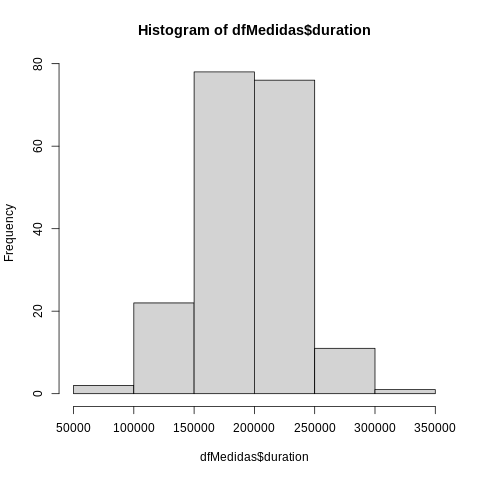

In [10]:
%%R
hist(dfMedidas$duration)
#La mayoría de canciones tinen una duración entre 2.5 minutos y 4,16 minutos
#3,3 mins = 200000 ms

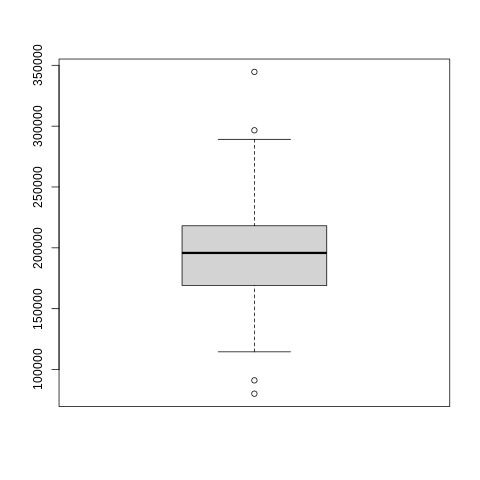

In [11]:
%%R
boxplot(dfMedidas$duration_ms)

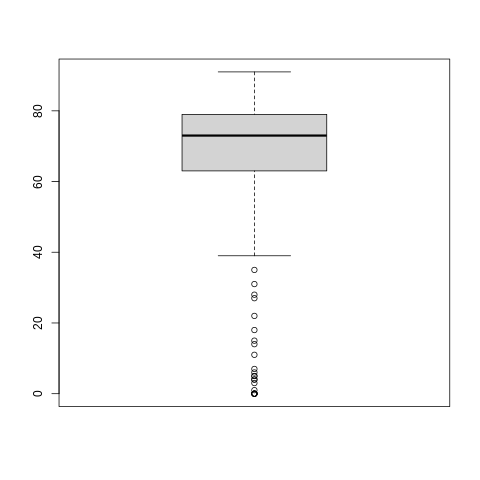

In [12]:
%%R
boxplot(dfMedidas$track_pop)

Como vemos, son considerados atipicos los datos ingeriores a 40 de popularidad. Como hemos dicho antes en general la mayoría de artistas tienen una alta popularidad. 

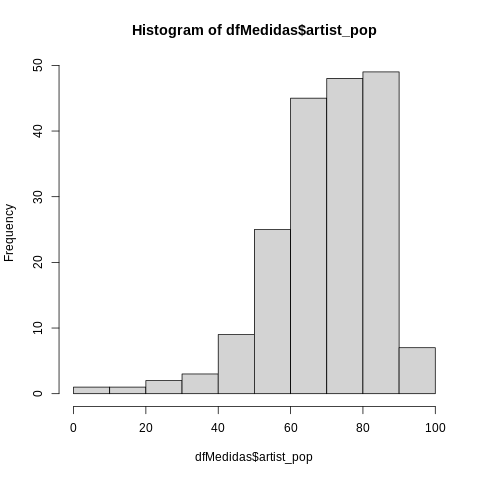

In [13]:
%%R

hist(dfMedidas$artist_pop)


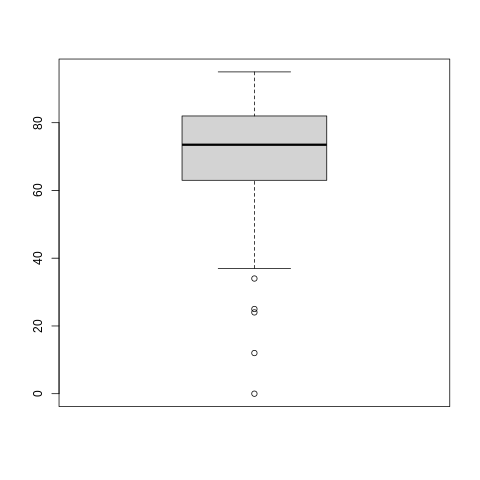

In [14]:
%%R
boxplot(dfMedidas$artist_pop)

En general la mayoría de los artistan tiene un indicie de popularidad alto. 
Sin embargo pocos alcanzan un indice entre 90 y 100. 
Hay algunos artistas olvidados ( con poca popularidad), estos al ser pocos son considerados incluso como datos atípicos.

No hay datos atipicos relevantes que haya que tratar en ninguna columna. Vamos a proceder a la transformación de datos. 

# Transformación de los datos.

Vemos primero si existen celdas con valor NA, al no tener pasamos a la conversión de datos. 

Donde principalmente pasamos los atributos categóricos a númericos para poder realizar sobre estos un análisis de correlación. 

In [15]:
%%R #No hay celdas nulas. 
sum(is.na(dfMedidas))

NULL


In [16]:
%%R
dfMedidas$track_name <- as.factor(as.character(dfMedidas$track_name))
dfMedidas$track_name <- as.numeric(dfMedidas$track_name)

In [17]:
%%R
dfMedidas$artist_name <- as.factor(as.character(dfMedidas$artist_name))
dfMedidas$artist_name <- as.numeric(dfMedidas$artist_name)

In [18]:
%%R
dfMedidas$album <- as.factor(as.character(dfMedidas$album))
dfMedidas$album <- as.numeric(dfMedidas$album)

In [19]:
%%R
class(dfMedidas$loudness)

[1] "numeric"


In [20]:
%%R
head(dfMedidas)

  track_name artist_name artist_pop album track_pop danceability energy
1        146         145         83   136        89        0.591  0.764
2        116          73         90    76        86        0.677  0.696
3         44          10         72    40        77        0.815  0.848
4         65          63         65    64        77        0.558  0.454
5         79         132         57    74        73        0.630  0.456
6        153          64         80   141        79        0.789  0.711
  loudness mode key speechiness acousticness instrumentalness liveness valence
1   -5.484    1   1      0.0483       0.0383         0.000000   0.1030   0.478
2   -6.181    1   0      0.1190       0.3210         0.000000   0.4200   0.464
3   -4.704    0   4      0.1150       0.0230         0.000162   0.0265   0.684
4   -5.335    1   6      0.0551       0.4990         0.000000   0.1460   0.424
5   -8.285    1   8      0.0317       0.5450         0.000000   0.1140   0.166
6   -4.248    1   2   

Una vez que todos los datos son númericos estandarizamos todo el conjunto y lo almacenamos en otra variable. 

In [21]:
%%R
dfScale <- as.data.frame(scale(dfMedidas))

In [22]:
%%R
head(dfMedidas)

  track_name artist_name artist_pop album track_pop danceability energy
1        146         145         83   136        89        0.591  0.764
2        116          73         90    76        86        0.677  0.696
3         44          10         72    40        77        0.815  0.848
4         65          63         65    64        77        0.558  0.454
5         79         132         57    74        73        0.630  0.456
6        153          64         80   141        79        0.789  0.711
  loudness mode key speechiness acousticness instrumentalness liveness valence
1   -5.484    1   1      0.0483       0.0383         0.000000   0.1030   0.478
2   -6.181    1   0      0.1190       0.3210         0.000000   0.4200   0.464
3   -4.704    0   4      0.1150       0.0230         0.000162   0.0265   0.684
4   -5.335    1   6      0.0551       0.4990         0.000000   0.1460   0.424
5   -8.285    1   8      0.0317       0.5450         0.000000   0.1140   0.166
6   -4.248    1   2   

# Análisis de correlación entre los datos. 

Realizaremos este análisis sobre el conjunto sin estandarizar. 

In [23]:
%%R
if (!require("mvtnorm", lib.loc = lib_loc)) install.packages("mvtnorm", lib = lib_loc)
if (!require("polycor", lib.loc = lib_loc)) install.packages("polycor", lib = lib_loc)
library(polycor, lib.loc = lib_loc)

correl <- hetcor(dfMedidas)
correl



Attaching package: ‘polycor’



    polyserial





Two-Step Estimates

Correlations/Type of Correlation:
                 track_name artist_name artist_pop    album track_pop
track_name                1     Pearson    Pearson  Pearson   Pearson
artist_name        -0.03101           1    Pearson  Pearson   Pearson
artist_pop        -0.001481     -0.1072          1  Pearson   Pearson
album                0.4911     0.04529   -0.07659        1   Pearson
track_pop           -0.1064      0.1879     0.3924 -0.06796         1
danceability       -0.04017     -0.1439    -0.1211  0.01243   -0.1214
energy              0.09109    -0.02765     0.0369 0.005777    0.1331
loudness           -0.04003    -0.01905    0.04938 0.001353    0.2247
mode                0.07758      0.1071    0.05707   0.1081   0.06962
key                 0.02067    -0.03433     0.0418 -0.06314   0.01574
speechiness          0.0866    -0.05308    -0.1106  0.08671  -0.07637
acousticness        0.03261     0.07906   -0.07136  0.04235   -0.1091
instrumentalness   -0.02094   -0.00

In [24]:
%%R
cor(dfMedidas)

                   track_name  artist_name   artist_pop        album
track_name        1.000000000 -0.031011314 -0.001480537  0.491110073
artist_name      -0.031011314  1.000000000 -0.107213624  0.045286223
artist_pop       -0.001480537 -0.107213624  1.000000000 -0.076594266
album             0.491110073  0.045286223 -0.076594266  1.000000000
track_pop        -0.106398133  0.187862981  0.392426165 -0.067958817
danceability     -0.040170688 -0.143926520 -0.121138348  0.012430227
energy            0.091089734 -0.027646570  0.036900012  0.005776766
loudness         -0.040031789 -0.019045871  0.049379794  0.001353005
mode              0.077576655  0.107077065  0.057074484  0.108084128
key               0.020670852 -0.034334123  0.041796390 -0.063137322
speechiness       0.086600922 -0.053083555 -0.110646615  0.086711131
acousticness      0.032610127  0.079060737 -0.071357592  0.042348846
instrumentalness -0.020942376 -0.006276522 -0.178067126 -0.037329155
liveness         -0.064325515 -0.0

In [25]:
%%R
colnames(dfMedidas)

 [1] "track_name"       "artist_name"      "artist_pop"       "album"           
 [5] "track_pop"        "danceability"     "energy"           "loudness"        
 [9] "mode"             "key"              "speechiness"      "acousticness"    
[13] "instrumentalness" "liveness"         "valence"          "tempo"           
[17] "time_signature"   "duration_ms"     



Attaching package: ‘zoo’



    as.Date, as.Date.numeric




Attaching package: ‘PerformanceAnalytics’



    legend




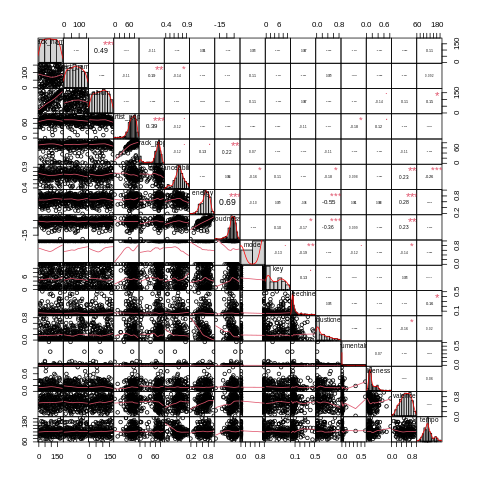

In [26]:
%%R
if (!require("zoo", lib.loc = lib_loc)) install.packages("zoo", lib = lib_loc)
if (!require("xts", lib.loc = lib_loc)) install.packages("xts", lib = lib_loc)
if (!require("PerformanceAnalytics", lib.loc = lib_loc)) install.packages("PerformanceAnalytics", lib = lib_loc)
library(PerformanceAnalytics, lib.loc = lib_loc)
chart.Correlation(dfMedidas[,c("track_name","artist_name","album","artist_pop","track_pop","danceability","energy","loudness","mode","key","speechiness"
,"acousticness","instrumentalness","liveness","valence","tempo")])

En general, los resultados del análisis de correlación no nos proporcionan mucha información. Podemos ver que las variables "album", "artist_name" y "track_name" no correlan con el resto de datos (solo correlan entre si) y  siendo origalmente categóricos que hemos transformado a númericos, decido que no son variables relevantes para realizar el clustering. 

Algunas relaciones entre los datos que resaltar por ejemplo son la alta relación entre la energía de la canción y el nivel de volumen (loudness). Entre la acústica de la canción y la energía. La popularidad de la canción con la popularidad del artista. 

In [27]:
%%R
dfScale <- dfScale[,!names(dfScale) %in% c("track_name","artist_name","album")]

Eliminamos de ambos conjuntos las variables "album", "artist_name" y "track_name" 

In [28]:
%%R
dfMedidas <- dfMedidas[,!names(dfMedidas) %in% c("track_name","artist_name","album")]

#Agrupamiento de los datos

No sabemos el número de clusters concreto, luego de momento vamos a representar nuestros datos agrupados. 



Attaching package: ‘ggplot2’



    %+%, alpha




---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: ‘dendextend’



    rotate



    cutree






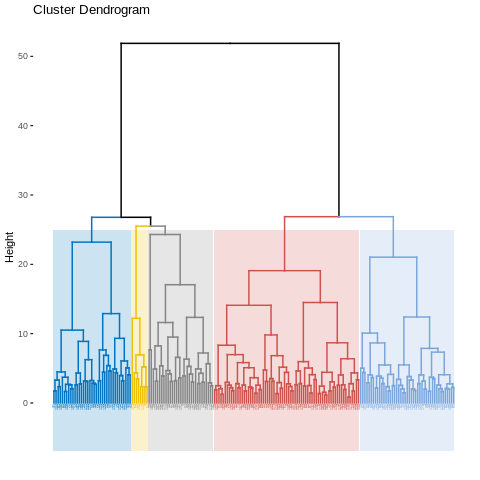

In [29]:
%%R
if (!require("ggpubr", lib.loc = lib_loc)) install.packages("ggpubr", lib = lib_loc)
if (!require("ggsci", lib.loc = lib_loc)) install.packages("ggsci", lib = lib_loc)
if (!require("dendextend", lib.loc = lib_loc)) install.packages("dendextend", lib = lib_loc)
if (!require("factoextra", lib.loc = lib_loc)) install.packages("factoextra", lib = lib_loc) #Libreria para hacer la jerárquía
library(factoextra, lib.loc = lib_loc)

distancia <- dist(dfScale, method = "euclidean") #matriz de distancias euclídeas
clus_hc <- hclust(distancia, method="ward.D") #ADEMAS utiliza este methodo

fviz_dend(clus_hc, k = 5, cex = 0.25, k_colors = "jco", color_labels_by_k = TRUE, rect = TRUE, rect_border = "jco", rect_fill = TRUE)#pa pintar



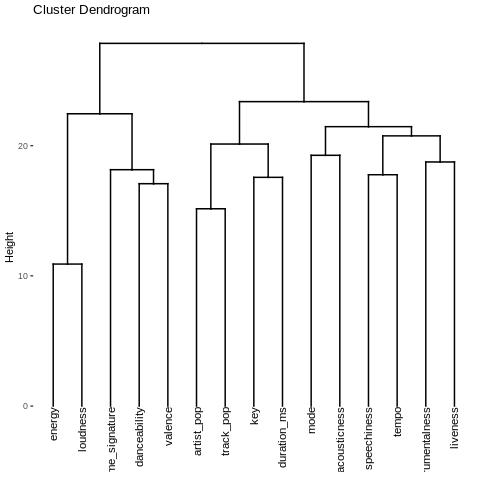

In [30]:
%%R
if (!require("ggpubr", lib.loc = lib_loc)) install.packages("ggpubr", lib = lib_loc)
if (!require("ggsci", lib.loc = lib_loc)) install.packages("ggsci", lib = lib_loc)
if (!require("dendextend", lib.loc = lib_loc)) install.packages("dendextend", lib = lib_loc)
if (!require("factoextra", lib.loc = lib_loc)) install.packages("factoextra", lib = lib_loc) #Libreria para hacer la jerárquía
library(factoextra, lib.loc = lib_loc)
distanciaT <- dist(t(dfScale), method = "euclidean") #matriz de distancias euclídeas
clus_hcT <- hclust(distanciaT, method="ward.D")
fviz_dend(clus_hcT)

Este diagrama de clustering nos proporciona con mucha más claridad la relación entre las distintas columnas de datos. 

Se repiten algunas que hemos mencionado como la popularidad del artista y la popularidad de la canción. Se relacionan la energía con el volumen, la instrumentalidad con la vividez. 


# Numero óptimo de agrupaciones
Para buscar el número optimo de agrupaciones buscamos tener clusteres donde la donde la distancia intracluster sea minima y entre cluster sea máxima. 



Attaching package: ‘reshape2’



    colsplit, melt, recast




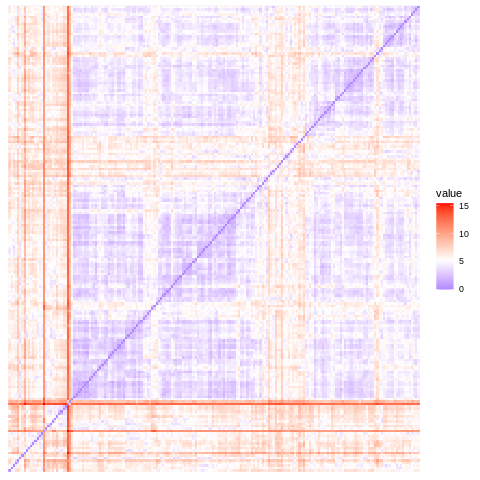

In [31]:
%%R
if (!require("reshape", lib.loc = lib_loc)) install.packages("reshape", lib = lib_loc)
library(reshape, lib.loc = lib_loc)
if (!require("reshape2", lib.loc = lib_loc)) install.packages("reshape2", lib = lib_loc)
library(reshape2, lib.loc = lib_loc)

fviz_dist(distancia, 
          gradient = list(low = "blue", mid = "white", high = "red"),
          order = TRUE, show_labels = FALSE)

Aqui vemos una estimación de forma gráfica de cuantos clusters puede haber, evaluando las distancias que hay entre instancías. Luego aqui vemos que de 5 para abajo. No nos dice nada concreto, hay que seguir investigando. 

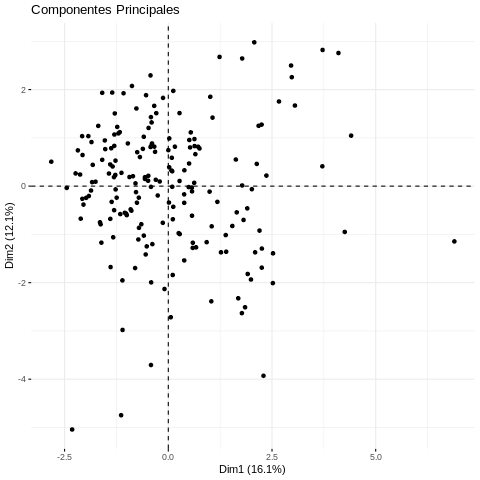

In [32]:
%%R
fviz_pca_ind(prcomp(dfScale), title = "Componentes Principales", 
             geom = "point")

Representando las dos dimensiones principales obtenemos el diagrama de encima. En el no vemos nada claro, aun con imaginación no se puede. Puede significar que la distancía intra clusters es baja. 

Calculamos el estadístico de Hopkins, que permite determinar si hay agrupaciones. 

Un valor próximo a 0.5 mostraría un comportamiento cercano al aleatorio, entre 0.01 y 0.3, los datos están distribuidos uniformemente y entre 0.7 y 0.99 mostrarían una tendencia clara a estar agrupados.

In [33]:
%%R 
get_clust_tendency(dfScale, n = nrow(dfScale)-1, graph = FALSE)

$hopkins_stat
[1] 0.752012

$plot
NULL



Se puede apreciar con el estadistico de hopkins que hay una tendencia clara a que los datos esten agrupados.

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 8 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 4 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number 

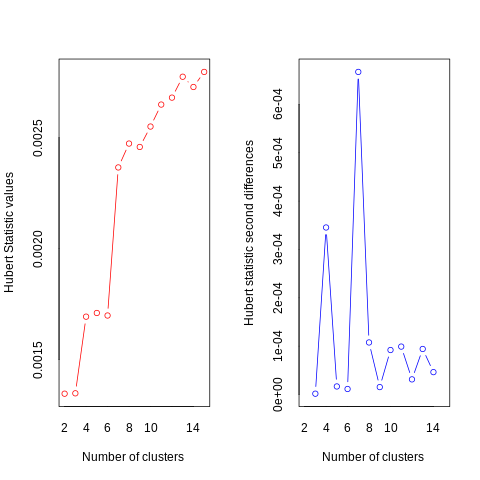

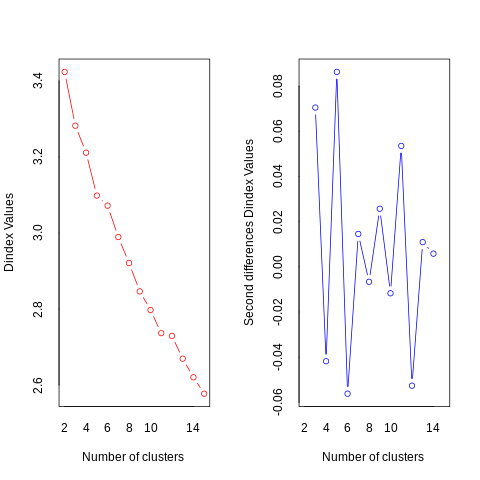

In [34]:
%%R #Kmeans & euclidean. 
if (!require("NbClust", lib.loc = lib_loc)) install.packages("NbClust", lib = lib_loc)
library(NbClust, lib.loc = lib_loc)

set.seed(123)
NbClust(dfScale, distance = "euclidean", min.nc = 2, max.nc = 15, method = "kmeans", index = "all")

Según los resultados, vemos que el resultado más optimo de agrupaciones son 2. 
No podemos sacar una conclusión puesto que solo hemos probado con el método "Kmeans" el cual es muy sensible a datos átipicos, es muy común empezar por este puesto que es muy poco costoso. Vamos a comprobar la eficacía de este resultado. 



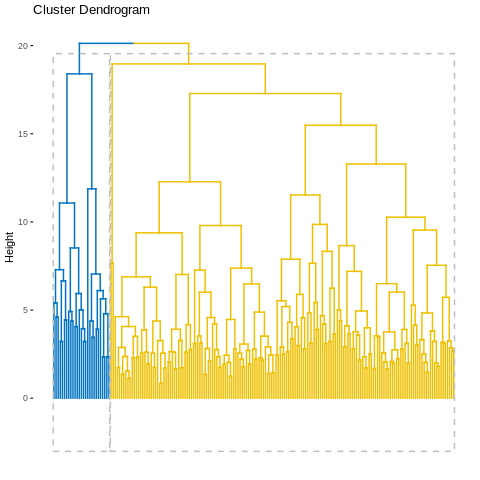

In [35]:
%%R
res_HC <- eclust(dfScale, "hclust", k = 2, graph = TRUE)
fviz_dend(res_HC, palette = "jco", rect = TRUE, show_labels = FALSE)


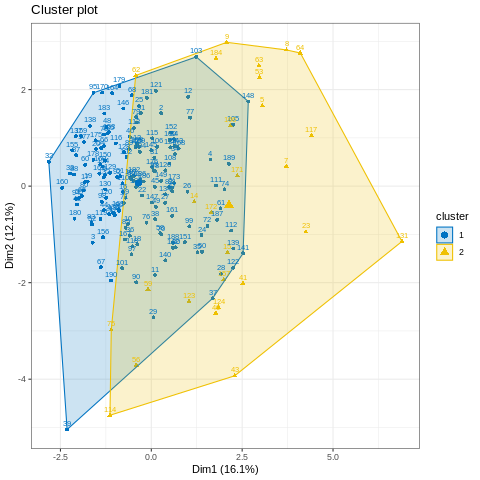

In [36]:
%%R
fviz_cluster(res_HC, data = dfScale, ellipse.type = "convex", palette = "jco", labelsize = 8) + theme_bw()

Podemos observar que hay mucho solapamiento entre los dos agrupamientos, luego podria ser malo. Hay que investigar más. 
En esta grafica solo vemos las agrupaciones entre dos dimensiones principales. 

Vamos a probar otro metódo para sacar el número de clusters del dataset. 

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 2 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 10 proposed 6 as the best number of clusters 
* 1 proposed 7 as the best number

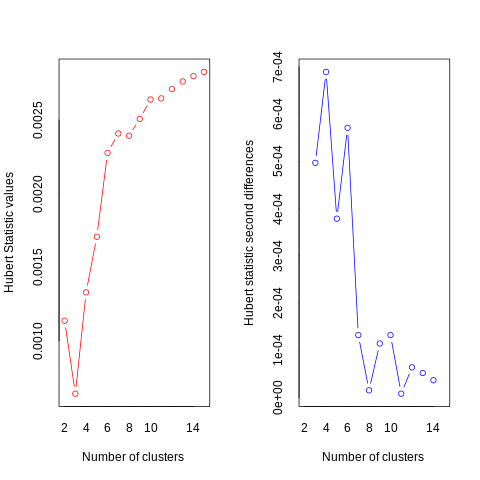

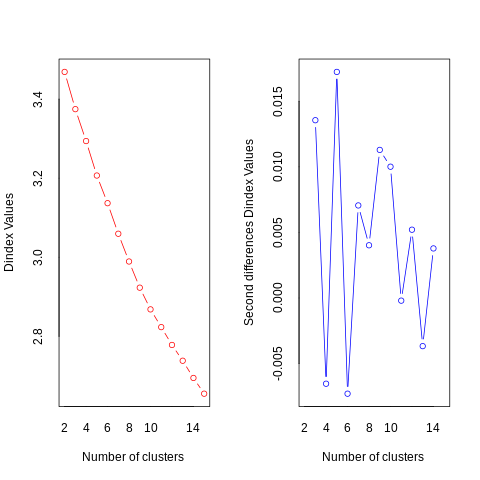

In [37]:
%%R
set.seed(123)
NbClust(dfScale, distance = "euclidean", min.nc = 2, max.nc = 15, method = "ward.D", index = "all")

Con el metódo wrad.D nos dice que son 6 el número de clusters apropiado. 

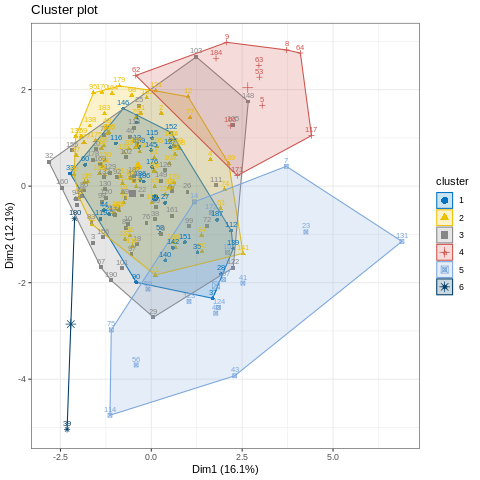

In [38]:
%%R
res_HC <- eclust(dfScale, "hclust", k = 6, graph = TRUE)
fviz_cluster(res_HC, data = dfScale, ellipse.type = "convex", palette = "jco", labelsize = 8) + theme_bw()

Claramente no pueden ser 6, todas las clases se solapan entre ellas. 
Vamos a probar con un último metódo. 

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 5 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number 

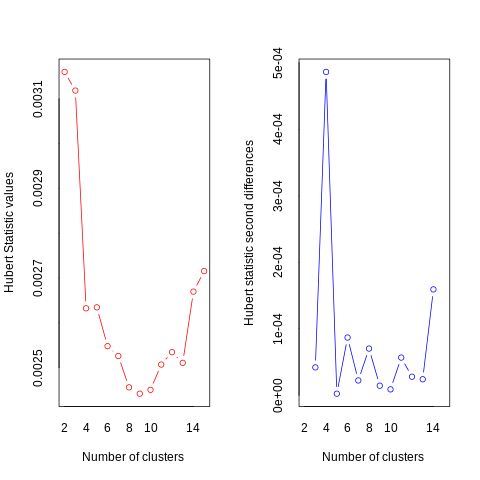

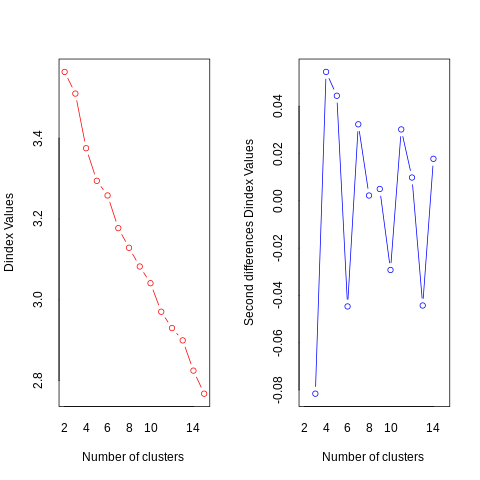

In [39]:
%%R
if (!require("NbClust", lib.loc = lib_loc)) install.packages("NbClust", lib = lib_loc)
library(NbClust, lib.loc = lib_loc)

set.seed(123)
NbClust(dfScale, distance = "euclidean", min.nc = 2, max.nc = 15, method = "complete", index = "all")

Este último test con el método "complete" nos resulta tambien en 2. 

Vamos a agrupar por particionamiento con este resultado para ver lo que ocurre. 

#Agrupamiento por Particionamiento
Utilizaremos K-means para el agrupamiento. El algoritmo intenta encontrar k grupos de datos similares entre sí. El algoritmo divide los datos en k grupos basados ​​en la similitud entre los datos, donde cada grupo es descrito por el valor medio de sus elementos. El objetivo del algoritmo es minimizar la suma de las distancias al cuadrado entre los datos y su centroide correspondiente. Los centroides son los valores medios de los grupos, y se utilizan para describir los grupos. El algoritmo iterativamente asigna cada punto de datos a un grupo y luego recalcula el centroide de ese grupo. Esto se repite hasta que el algoritmo converge y los grupos y los centroides se estabilizan.

In [40]:
%%R
set.seed(123)
res_KM <- kmeans(dfScale, 2, nstart = 20)
print(res_KM$centers)


   artist_pop  track_pop danceability     energy   loudness        mode
1  0.04671532  0.1131422   0.04013975  0.5071619  0.4552501 -0.07219294
2 -0.09644454 -0.2335840  -0.08286917 -1.0470440 -0.9398712  0.14904350
         key speechiness acousticness instrumentalness   liveness    valence
1  0.1845060 -0.06814181   -0.4186526       0.04800155 -0.0728143  0.2005011
2 -0.3809157  0.14067986    0.8643150      -0.09909998  0.1503263 -0.4139377
        tempo time_signature duration_ms
1 -0.03630961      0.1547602  0.06928604
2  0.07496178     -0.3195050 -0.14304215


Los valores de encima están estandarizados de todas formas con los centroides se puede hacer una representación de las clases: 

La clase 1 se corresponde con canciones más populares (de artistas más populares) con más energía, más volumen, más instrumental, más bailable con un poco más de duración. 

La clase 2 se corresponde  más bien con canciones menos populares, menos bailables, con más letra y más acústica, con más vivacidad y con un tempo mayor. 

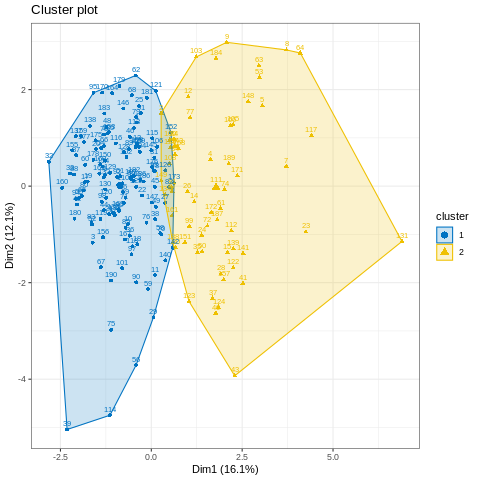

In [41]:
%%R
fviz_cluster(res_KM, data = dfScale, ellipse.type = "convex",
             palette = "jco", labelsize = 8) +
             theme_bw()

Vemos que haciendo Kmeans fijando dos clusters hay mucho menos solapamiento entre los dos clusters de las componentes principales que en la agrupación jerárquica. 

Esto tiene buena pinta, de todas formas hay que investigar más.

Vamos a subir el número de clusteres a 3, para ver el resultado.  


In [42]:
%%R

set.seed(123)
res_KM2 <- kmeans(dfScale, 3, nstart = 20)
print(res_KM2$centers)


  artist_pop   track_pop danceability     energy   loudness        mode
1  0.2658882  0.08267672 -1.069005002 -1.4688017 -1.3103958  0.12984586
2  0.2998265  0.34563461 -0.003538584  0.4296323  0.4189023  0.09377756
3 -0.8045306 -0.84405904  0.406582845 -0.4636989 -0.4974657 -0.26902704
          key speechiness acousticness instrumentalness     liveness    valence
1 -0.24436102  -0.2377528    1.5249981      -0.14612888  0.095625486 -1.2722852
2  0.03102427  -0.2797737   -0.3573340      -0.05067138  0.001665756  0.1041472
3  0.01803818   0.7468656    0.2726492       0.17366695 -0.039544607  0.2289365
        tempo time_signature duration_ms
1  0.22599239     -1.5011998   0.2733994
2 -0.07546503      0.1305391   0.1820418
3  0.09337153      0.2521197  -0.5301883


Más dificil representar las tres clases de canciones. 

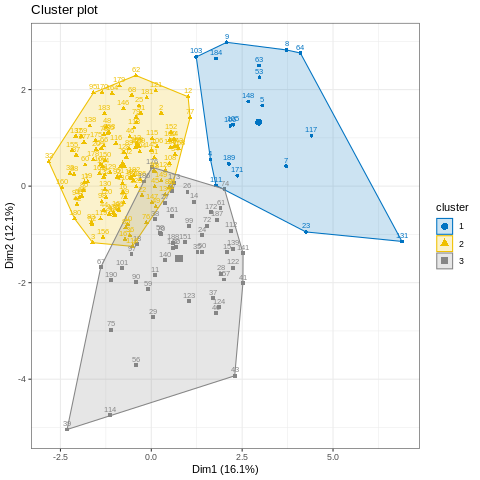

In [43]:
%%R
fviz_cluster(res_KM2, data = dfScale, ellipse.type = "convex",
             palette = "jco", labelsize = 8) +
             theme_bw()

Podemos ver que no hay tanto solapamiento como esperado. Sin embargo en comparación con el modelo de 2 clusters si que tiene mayor solapamiento de clases. Luego nos quedamos con el modelo anterior (k=2)

# PAM
 algoritmo de particionamiento que mejora su robustez frente a datos atípicos

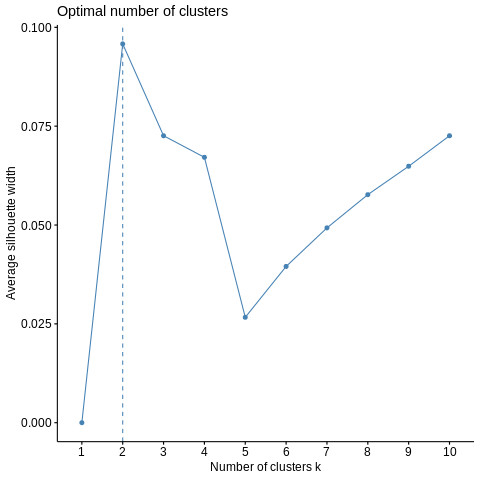

In [44]:
#@title ⚠️ Encontrar el número óptimo de agrupaciones para PAM
%%R
if (!require("pam", lib.loc = lib_loc)) install.packages("pam", lib = lib_loc)
if (!require("cluster", lib.loc = lib_loc)) install.packages("cluster", lib = lib_loc)

set.seed(123)
fviz_nbclust(dfScale, pam, method = "silhouette")


In [45]:
%%R
res_PAM <- pam(dfScale, 2)


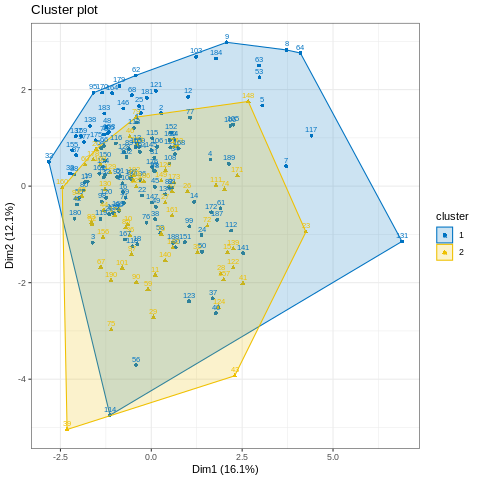

In [46]:
%%R
fviz_cluster(res_PAM, data = dfScale, ellipse.type = "convex",
             palette = "jco", labelsize = 8) +
             theme_bw()

Solapamiento casi completo de los datos entre los dos clusters. Descartamos el PAM. 

# Agrupamiento borroso (Fuzzy C-Means)

Fuzzy C-Means es un algoritmo basado en membresía que divide un conjunto de datos en K grupos. A diferencia de K-Means, Fuzzy C-Means asigna un grado de pertenencia a cada punto de datos para cada grupo basado en la similitud. Esto se logra minimizando la función de objetivo que mezcla la distancia al cuadrado de cada punto al centro del grupo con el grado de pertenencia de cada punto al grupo.


In [47]:
%%R
if (!require("ppclust", lib.loc = lib_loc)) install.packages("ppclust", lib = lib_loc)
library(ppclust, lib.loc = lib_loc)

res_FCM <- fcm(dfScale, centers = 2, nstart=5) #Determinadas 2 agrupaciones


Attaching package: ‘ppclust’



    pca




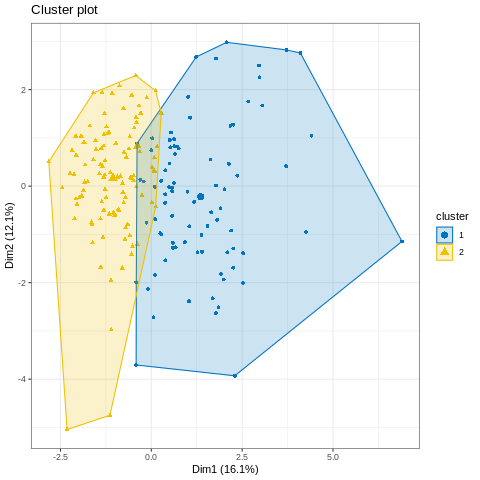

In [48]:
%%R
res_FCMfe <- ppclust2(res_FCM, "kmeans")
fviz_cluster(res_FCMfe, data = dfScale, ellipse = TRUE, geom = "point", palette = "jco") + theme_bw()

El modelo con el algoritmo Fuzzy C-Means nos resulta en un resultado decente, donde sigue existiendo solapamiento entre las dos clases. Habrá que compararlo con el modelo obtenido con K-Means. Sin embargo a ojo tiene pinta de que este modelo tiene un solapamiento mayor. 


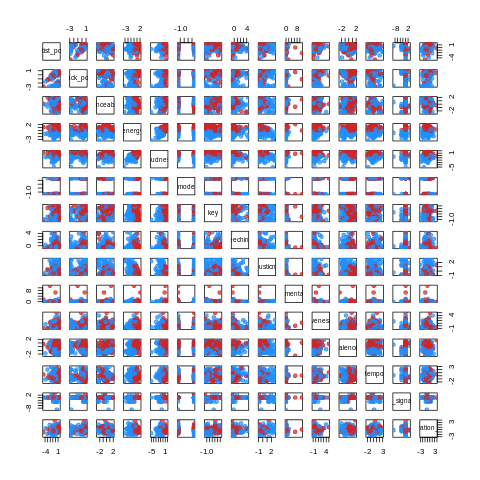

In [49]:
%%R
plotcluster(res_FCM, cp=1, trans=TRUE)

Podemos ver en la gráfica superior la división de los datos en los dos clusters. Podemos ver por ejemplo que el atribuo "loudness" y "energy" si que se puede separar bien en dos conjuntos. Sin embargo, generalmente los atributos no se pueden separar limpiamente en dos conjuntos, estan muy mezclados.

# HCPC (Hierarchical Clustering on Principal Components).
encontrar las agrupaciones de datos pero transformados previamente mediante PCA

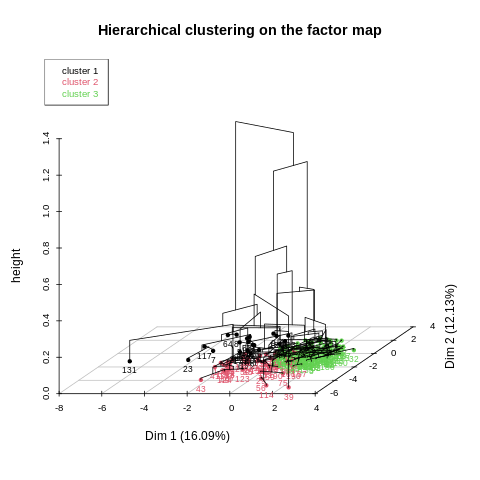

In [50]:
%%R
if (!require("FactoMineR", lib.loc = lib_loc)) install.packages("FactoMineR", lib = lib_loc)
library(FactoMineR, lib.loc = lib_loc)

res_PCA <- PCA(dfScale, graph = FALSE)
res_HCPC <- HCPC(res_PCA, graph = FALSE)
plot(res_HCPC, choice = "3D.map")

viendo la proyección sobre el plano

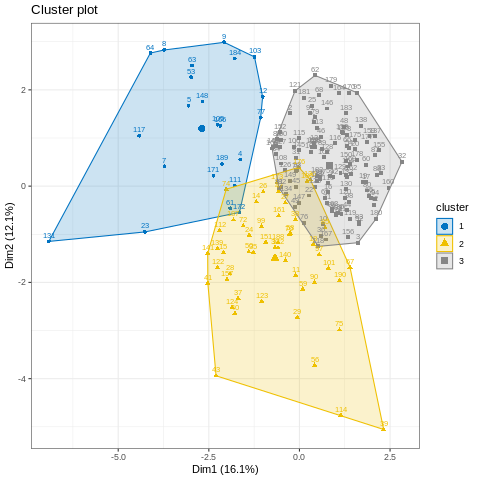

In [51]:
%%R
fviz_cluster(res_HCPC, ellipse.type = "convex", palette = "jco", labelsize = 8) + theme_bw()

No se pone a priori el número de clusters necesarios, este modelo a determinado 3 clusters como número óptimo. Pero el cluster 2 se solapa con el cluster 1 y 3. 

Luego no hay suficiente separabilidad de clusters. 

In [52]:
%%R
res_HCPC$desc.var$quanti

$`1`
                  v.test Mean in category  Overall mean sd in category
acousticness    6.775653        1.3245511 -1.298304e-17      1.1259872
key            -2.039663       -0.3987272  9.177600e-17      0.8046550
danceability   -4.120497       -0.8055030  4.572320e-16      1.2995579
loudness       -6.082496       -1.1890479  3.431100e-17      1.1195362
time_signature -6.227627       -1.2174191  3.967586e-16      2.2067027
valence        -6.332103       -1.2378428 -1.838898e-16      0.7331326
energy         -7.228577       -1.4130917  2.298897e-16      0.7268469
               Overall sd      p.value
acousticness    0.9973649 1.238452e-11
key             0.9973649 4.138394e-02
danceability    0.9973649 3.780556e-05
loudness        0.9973649 1.183258e-09
time_signature  0.9973649 4.735526e-10
valence         0.9973649 2.418417e-10
energy          0.9973649 4.880800e-13

$`2`
                  v.test Mean in category  Overall mean sd in category
speechiness     6.753207        0.8088

Se puede ver el atributo principal que caracteriza cada cluster de este modelo. 

El primer cluster esta carácterizado por la acústica. 

El segundo cluster por la cantidad de letra en la canción (speechness)

El tercer cluster por la energía y el volumen. 

Se va generando una conclusión sobre este conjunto de datos: Los atributos no son lo suficientemente carácteristicos para separar limpiamente los datos en distintas clases. 

# Representación y análisis de las clases

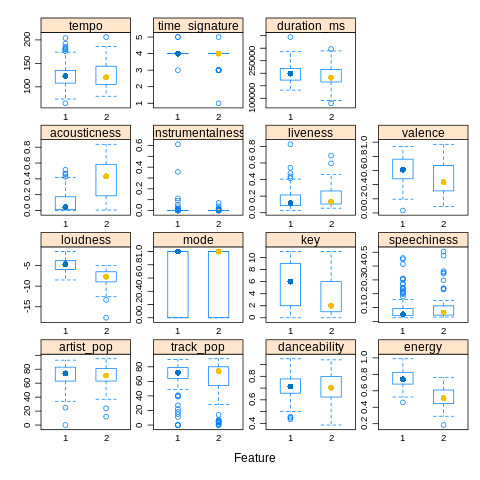

In [53]:
%%R
if (!require("caret", lib.loc = lib_loc)) install.packages("caret", lib = lib_loc)
library(caret, lib.loc = lib_loc)

featurePlot(x = dfMedidas, y = as.factor(res_KM$cluster), plot = "box",
col = c("#0073C2FF", "#EFC000FF", "#868686FF"),
scales = list(x = list(relation = "free"), y = list(relation = "free")))

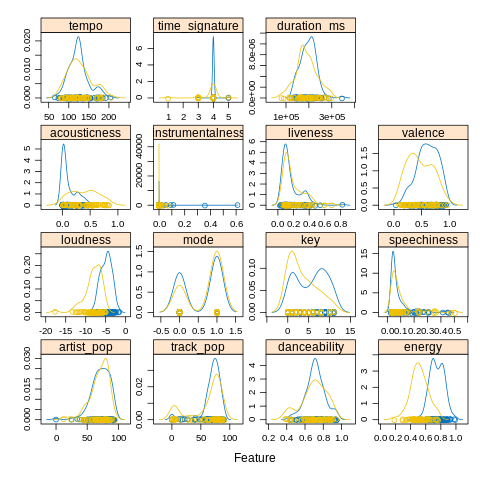

In [54]:
%%R
featurePlot(x = dfMedidas, y = as.factor(res_KM$cluster), plot = "density",
col = c("#0073C2FF", "#EFC000FF", "#868686FF"),
scales = list(x = list(relation = "free"), y = list(relation = "free")))

Como vemos hay atributos que separan mejor las clases que otros. Sin embargo, la mayoría no hace distincción entre la primera y la segunda. Las clases están muy solapadas en la gran mayoría de atributos. 

Como hemos visto antes los atributos más relevantes son la Energía(energy), el volumen (loudness) y igual la acústica. 

Podríamos representar las clases como dicho anteriormente: 

La clase 1 se corresponde con canciones más populares (de artistas más populares) con más energía, más volumen, más instrumental, más bailable con un poco más de duración. 

La clase 2 se corresponde  más bien con canciones menos populares, menos bailables, con más letra y más acústica, con más vivacidad y con un tempo mayor. 





#Comparación de modelos y Valdicación de resultados. 

Vamos a comparar los distintos modelos que hemos obtenido para ver con cual nos quedamos. Para esto utilizaremos la librería fpc incorpora una función para calcular muchos índices de desempeño.

Vamos a utilizar la distancía eúclidea. 

Los modelos que vamos a comparar son: 
1.   res_KM  
2.   res_FCMfe







In [56]:
%%R
distancia <- dist(dfScale, method = "euclidean")


Vamos a utilizar las siguientes métricas para comparar los modelos: 

max.diameter: diametro maximo de los clusters, preferiblemente el de menor tamaño.

min.separation: separación mínima, preferiblemente la separación que sea de mayor tamaño.

average.between; distancia media entre clases, Preferiblemente la distancía de mayor tamaño.

average.within: distancia media intra-clases, Preferiblemente la distancía de menor tamaño.

dunn: índice de Dunn, Preferiblemente el valor más alto. 
 

In [63]:
%%R
c_stats <- c("max.diameter", "min.separation", 
           "average.between", "average.within",
           "dunn")


In [66]:
%%R
if (!require("fpc", lib.loc = lib_loc)) install.packages("fpc", lib = lib_loc)
library(fpc, lib.loc = lib_loc)

res_statsKM <- cluster.stats(distancia, res_KM$cluster)
res_statsFCMfe <- cluster.stats(distancia, res_FCMfe$cluster)
cbind(KM = res_statsKM[names(res_statsKM) %in% c_stats], 
                 FCMfe = res_statsFCMfe[names(res_statsFCMfe) %in% c_stats])

                KM        FCMfe    
average.between 5.772565  5.59129  
average.within  4.915847  4.913599 
max.diameter    13.6383   13.6383  
min.separation  1.767056  1.747487 
dunn            0.1295658 0.1281309


Con la comparativa de los modelos podemos sacar varias conclusiones: 
Primero de todo que ambos modelos son muy parecidos, tiene sentido ya que las técnicas empleadas para sacar los clusters no difieren tanto (K-means | Fuzzy-C-Means). 

El diametro máximo es igual en ambos modelos. La separación minima es mayor por muy poco en el  modelo KM. La distancía media entre clases es mayor en el KM. La distancía media intra-clases es levemente menor en el modelo Fuzzy y el indice de Dunn es un poco mayor en el KM. 

Teniendo en cuenta las preferencías mencionadas anteriormente conluimos que el modelo K-Means es el mejor modelo. 



# Conclusión

Hemos visto que los datos no son muy favorables para clustering, ya que la gran mayoría de los atributos se solapan en las dos clases. Lo cual dificulta mucho la tarea de división del conjunto en diferentes clusters. Es decir, los datos no son suficientemente separables para clustering. Aun asi, El modelo que mejor se adapta a los datos y encuentra la mejor división de clases es el modelo K-Means, utilizando k=2 como número de clusters óptimo. Sin embargo, no consigue una separación completa entre las clases, sigue habiendo una leve solapación entre los dos clusters. 


